In [1]:
#Dataset- https://www.kaggle.com/c/fake-news/data#

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('news_train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
df=df.dropna()

In [15]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [16]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [17]:
y=df['label']

In [18]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [19]:
df.shape

(18285, 5)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [21]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [22]:
messages=df.copy()

In [23]:
messages.reset_index(inplace=True)

In [26]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [27]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [28]:
X.shape

(18285, 5000)

In [29]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [31]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [32]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [35]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
import matplotlib.pyplot as plt

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
#Multinomial NB

In [40]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [41]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


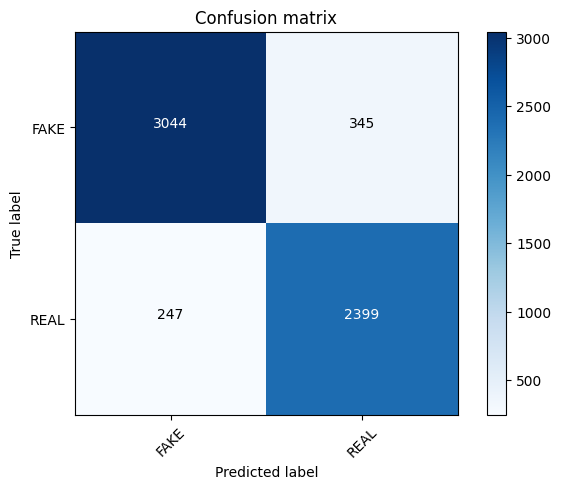

In [42]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [43]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

In [44]:
y_train.shape

(12250,)

In [45]:
#Passive Aggressive Classifier Algorithm

In [47]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.921
Confusion matrix, without normalization


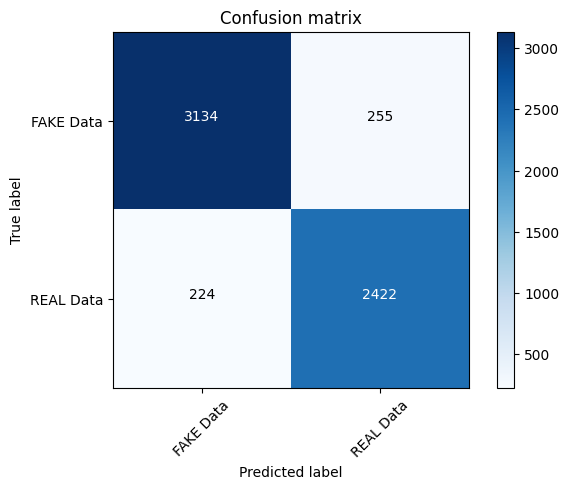

In [48]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [49]:
#Multinomial Classifier with Hyperparameter

In [50]:
classifier=MultinomialNB(alpha=0.1)

In [51]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/Users/maddy16/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/maddy16/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0, Score : 0.5615575807787904
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [53]:
## Get Features names
feature_names = cv.get_feature_names_out()

In [55]:
# Get feature log probabilities for the best model
feature_log_prob = classifier.feature_log_prob_

# Print the log probabilities for the first class
print(feature_log_prob[0])


[ -9.06056227  -9.06056227 -10.28838629 ...  -9.99212048 -11.45845755
  -9.42157562]


In [57]:
### Most real
sorted(zip(feature_log_prob[0], feature_names), reverse=True)[:20]

[(-2.9468577463990755, 'new'),
 (-2.994219848520549, 'time'),
 (-3.000566240637532, 'york'),
 (-3.0008020674474167, 'new york'),
 (-3.014815217142134, 'york time'),
 (-3.014815217142134, 'new york time'),
 (-3.9648310157438633, 'breitbart'),
 (-4.004573851696944, 'trump'),
 (-5.2756841712452855, 'donald'),
 (-5.282590276041697, 'donald trump'),
 (-5.755045510465673, 'say'),
 (-5.992274458590198, 'obama'),
 (-6.016039835625665, 'clinton'),
 (-6.106599412671392, 'presid'),
 (-6.122523316028115, 'state'),
 (-6.177512429323892, 'report'),
 (-6.188882648465076, 'attack'),
 (-6.253840544739848, 'hous'),
 (-6.259960514881633, 'brief'),
 (-6.316793989644799, 'hillari')]

In [58]:
### Most fake
sorted(zip(feature_log_prob[0], feature_names))[:5000]

[(-11.458457546147459, 'access pipelin protest'),
 (-11.458457546147459, 'acknowledg emf'),
 (-11.458457546147459, 'acknowledg emf damag'),
 (-11.458457546147459, 'acquit'),
 (-11.458457546147459, 'acr'),
 (-11.458457546147459, 'adhd'),
 (-11.458457546147459, 'airstrik kill'),
 (-11.458457546147459, 'al nusra'),
 (-11.458457546147459, 'america last'),
 (-11.458457546147459, 'america vote'),
 (-11.458457546147459, 'american concern'),
 (-11.458457546147459, 'american concern elect'),
 (-11.458457546147459, 'american peopl defeat'),
 (-11.458457546147459, 'aqsa'),
 (-11.458457546147459, 'arabian'),
 (-11.458457546147459, 'ariel noyola'),
 (-11.458457546147459, 'ariel noyola rodr'),
 (-11.458457546147459, 'ask question'),
 (-11.458457546147459, 'auf'),
 (-11.458457546147459, 'avail'),
 (-11.458457546147459, 'babi powder'),
 (-11.458457546147459, 'bad news'),
 (-11.458457546147459, 'badg'),
 (-11.458457546147459, 'ballot'),
 (-11.458457546147459, 'baltic'),
 (-11.458457546147459, 'banana')

In [59]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [60]:
X.shape

(18285, 5000)

In [61]:
y=messages['label']

In [65]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [66]:
tfidf_v.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [67]:

tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [70]:
count_df2 = pd.DataFrame(X1_train, columns=tfidf_v.get_feature_names_out())

In [71]:
count_df2.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


accuracy:   0.882
Confusion matrix, without normalization


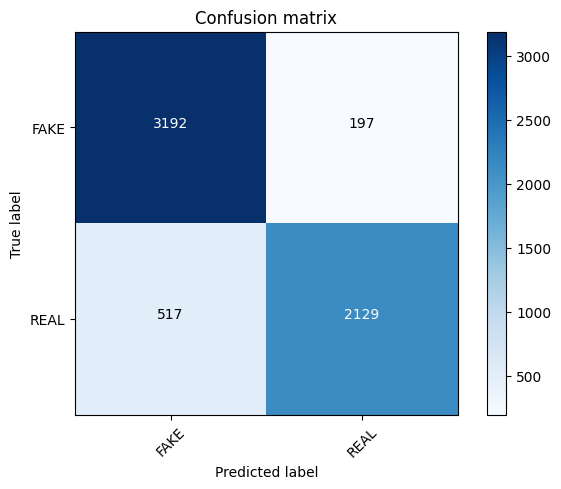

In [72]:
#Multinomial NB
classifier.fit(X1_train, y1_train)
pred1 = classifier.predict(X1_test)
score = metrics.accuracy_score(y1_test, pred1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(y1_test, pred1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [73]:
classifier.fit(X1_train, y1_train)
pred1 = classifier.predict(X1_test)
score1 = metrics.accuracy_score(y1_test, pred1)
score1

0.8816901408450705

In [75]:
y1_train.shape

(12250,)

accuracy:   0.916
Confusion matrix, without normalization


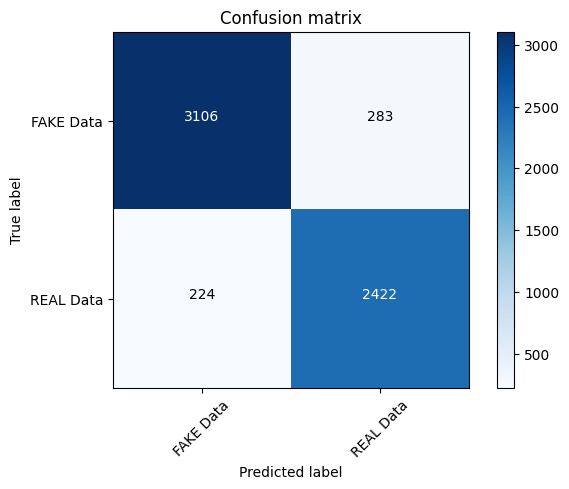

In [76]:
#Passive Aggressive Classifier Algorithm
linear_clf.fit(X1_train, y1_train)
pred1 = linear_clf.predict(X1_test)
score1 = metrics.accuracy_score(y1_test, pred1)
print("accuracy:   %0.3f" % score1)
cm1 = metrics.confusion_matrix(y1_test, pred1)
plot_confusion_matrix(cm1, classes=['FAKE Data', 'REAL Data'])

In [77]:
#Multinomial Classifier with Hyperparameter

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X1_train,y1_train)
    y1_pred=sub_classifier.predict(X1_test)
    score1 = metrics.accuracy_score(y1_test, y1_pred)
    if score1>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score1))

/Users/maddy16/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/maddy16/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0, Score : 0.5615575807787904
Alpha: 0.1, Score : 0.8777133388566695
Alpha: 0.2, Score : 0.8801988400994201
Alpha: 0.30000000000000004, Score : 0.87986743993372
Alpha: 0.4, Score : 0.8808616404308203
Alpha: 0.5, Score : 0.8806959403479702
Alpha: 0.6000000000000001, Score : 0.8815244407622204
Alpha: 0.7000000000000001, Score : 0.8813587406793704
Alpha: 0.8, Score : 0.8816901408450705
Alpha: 0.9, Score : 0.8816901408450705


In [78]:
## Get Features names
feature_names = cv.get_feature_names_out()

In [80]:
# Get feature log probabilities for the best model
feature_log_prob = classifier.feature_log_prob_

# Print the log probabilities for the first class
print(feature_log_prob[0])

[ -8.59813984  -8.64311917  -9.67080665 ...  -9.40176836 -10.25997178
  -8.97209716]


In [81]:
### Most real
sorted(zip(feature_log_prob[0], feature_names), reverse=True)[:20]

[(-3.94976034988254, 'new'),
 (-3.9689481006947727, 'york'),
 (-3.969032969681349, 'new york'),
 (-3.9728936199761273, 'time'),
 (-3.979866660651135, 'york time'),
 (-3.979866660651135, 'new york time'),
 (-4.6215808113530885, 'breitbart'),
 (-4.797902430598907, 'trump'),
 (-5.666344542746281, 'donald'),
 (-5.669113589614728, 'donald trump'),
 (-6.0459788417963765, 'say'),
 (-6.244307613966833, 'obama'),
 (-6.323461418144095, 'presid'),
 (-6.352839646565577, 'state'),
 (-6.356125020747031, 'attack'),
 (-6.388987201018693, 'report'),
 (-6.448929663358422, 'hous'),
 (-6.45906496727267, 'clinton'),
 (-6.537209809297861, 'brief'),
 (-6.577300430009248, 'kill')]

In [82]:
### Most fake
sorted(zip(feature_log_prob[0], feature_names))[:5000]

[(-10.259971779167145, 'access pipelin protest'),
 (-10.259971779167145, 'acknowledg emf'),
 (-10.259971779167145, 'acknowledg emf damag'),
 (-10.259971779167145, 'acquit'),
 (-10.259971779167145, 'acr'),
 (-10.259971779167145, 'adhd'),
 (-10.259971779167145, 'airstrik kill'),
 (-10.259971779167145, 'al nusra'),
 (-10.259971779167145, 'america last'),
 (-10.259971779167145, 'america vote'),
 (-10.259971779167145, 'american concern'),
 (-10.259971779167145, 'american concern elect'),
 (-10.259971779167145, 'american peopl defeat'),
 (-10.259971779167145, 'aqsa'),
 (-10.259971779167145, 'arabian'),
 (-10.259971779167145, 'ariel noyola'),
 (-10.259971779167145, 'ariel noyola rodr'),
 (-10.259971779167145, 'ask question'),
 (-10.259971779167145, 'auf'),
 (-10.259971779167145, 'avail'),
 (-10.259971779167145, 'babi powder'),
 (-10.259971779167145, 'bad news'),
 (-10.259971779167145, 'badg'),
 (-10.259971779167145, 'ballot'),
 (-10.259971779167145, 'baltic'),
 (-10.259971779167145, 'banana')

In [87]:
#HashingVectorizer

hs_vectorizer=HashingVectorizer(n_features=5000)
X=hs_vectorizer.fit_transform(corpus).toarray()
X = np.abs(hs_vectorizer.fit_transform(corpus).toarray())

In [88]:
X.shape

(18285, 5000)

In [89]:
X

array([[0.        , 0.31622777, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [90]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.871
Confusion matrix, without normalization


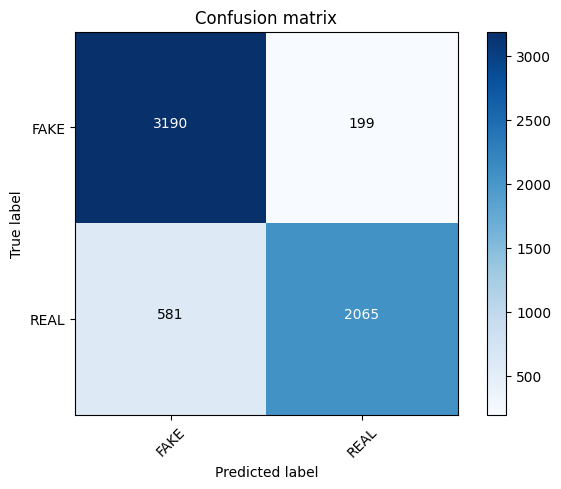

In [91]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X3_train, y3_train)
pred3 = classifier.predict(X3_test)
score3 = metrics.accuracy_score(y3_test, pred3)
print("accuracy:   %0.3f" % score3)
cm = metrics.confusion_matrix(y3_test, pred3)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])